The objective of this project is to scrape and analyze 300 movies from IMDB Website.We try to examine the data using EDA techniques to find the relationship between features like boxoffice, ratings, user votings and genre

Importing libraries

In [1]:
import requests
import re
import bs4
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [98]:
movie_titles=[]
movie_ratings=[]
release_year=[]
user_votings=[]
genres=[]
metascore=[]
movie_runtime=[]
movie_certificate=[]
boxoffice_=[]

Scraping the data from IMDB Website

In [99]:
base_url='https://www.imdb.com/search/title/?groups=top_1000&sort=user_rating,desc&start={}&ref_=adv_nxt'
headers = {'Accept-Language': 'en-US, en;q=0.5'}
for page in range(1,550,50):
  res= requests.get(base_url.format(page),headers=headers)
  soup= bs4.BeautifulSoup(res.text,'lxml')
  attr= soup.find_all('div',attrs={'class':'lister-item mode-advanced'})
  for feature in attr:

    try:
      title=feature.find('h3',attrs={'class':'lister-item-header'})
      movie_titles.append(title.text.split('\n')[2])
    except AttributeError:
      movie_titles.append('')

    try:
      rating=feature.find('div',attrs={'class':'inline-block ratings-imdb-rating'})
      movie_ratings.append(float(rating['data-value'].strip()))
    except AttributeError:
      movie_ratings.append('')

    try:
      year=feature.find('span',attrs={'class':'lister-item-year text-muted unbold'})
      release_year.append(year.text.strip('()'))
    except AttributeError:
      release_year.append('')
    
    try:
      vote=feature.find('p',attrs={'class':'sort-num_votes-visible'})
      user_votings.append(vote.text.split('\n')[2])
    except AttributeError:
      user_votings.append('')
    
    try:
      collections = feature.find_all('span', attrs={'name':'nv'})
      if len(collections)>1:
        collection=collections[1].text
        boxoffice_.append(collection)
        
      else:
        boxoffice_.append(np.NAN)     
    except AttributeError:
      boxoffice_.append('')
      
    try:
      score=feature.find('div',attrs={'class':'inline-block ratings-metascore'})
      if score is None:
        metascore.append(np.NAN)
      else:
        metascore.append(score.text.split()[0])
    except AttributeError:
      metascore.append('')
      
    try:
      genre=feature.find('span',attrs={'class':'genre'})
      genres.append(genre.text.strip('\n'))
    except AttributeError:
      genres.append('')
    
    try:
      runtime=feature.find('span',attrs={'class':'runtime'})
      movie_runtime.append(runtime.text)
    except AttributeError:
      movie_runtime.append('')
      
    try:
      certificate=feature.find('span',attrs={'class':'certificate'})
      if certificate is None:
        movie_certificate.append(np.NAN)
      else:
        movie_certificate.append(certificate.text)
    except AttributeError:
      movie_certificate.append('')


Creating a Data Frame 

In [100]:
data_df=pd.DataFrame({'Title':movie_titles,'Rating':movie_ratings,'Year':release_year,'Voting':user_votings,'Genre':genres,'Runtime':movie_runtime,'metascore':metascore,'certificate':movie_certificate,'boxoffice':boxoffice_})


In [101]:
data_df.head(10)

,Title,Rating,Year,Voting,Genre,Runtime,metascore,certificate,boxoffice
0,The Shawshank Redemption,9.3,1994,"2,454,954",Drama,142 min,80,R,$28.34M
1,The Godfather,9.2,1972,"1,698,828","Crime, Drama",175 min,100,R,$134.97M
2,Soorarai Pottru,9.1,2020,"89,313",Drama,153 min,NaN,TV-MA,NaN
3,The Dark Knight,9.0,2008,"2,410,657","Action, Crime, Drama",152 min,84,PG-13,$534.86M
4,The Godfather: Part II,9.0,1974,"1,179,886","Crime, Drama",202 min,90,R,$57.30M
5,12 Angry Men,9.0,1957,"726,757","Crime, Drama",96 min,96,Approved,$4.36M
6,Dara of Jasenovac,8.9,2020,"79,001","Drama, War",130 min,NaN,R,NaN
7,The Lord of the Rings: The Return of the King,8.9,2003,"1,704,793","Action, Adventure, Drama",201 min,94,PG-13,$377.85M
8,Pulp Fiction,8.9,1994,"1,902,506","Crime, Drama",154 min,94,R,$107.93M
9,Schindler's List,8.9,1993,"1,262,600","Biography, Drama, History",195 min,94,R,$96.90M


In [102]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        550 non-null    object 
 1   Rating       550 non-null    float64
 2   Year         550 non-null    object 
 3   Voting       550 non-null    object 
 4   Genre        550 non-null    object 
 5   Runtime      550 non-null    object 
 6   metascore    432 non-null    object 
 7   certificate  544 non-null    object 
 8   boxoffice    447 non-null    object 
dtypes: float64(1), object(8)
memory usage: 38.8+ KB


In [103]:
data_df.shape

(550, 9)

In [104]:
data_df.columns

Index(['Title', 'Rating', 'Year', 'Voting', 'Genre', 'Runtime', 'metascore',
       'certificate', 'boxoffice'],
      dtype='object')

Data Cleaning

In [105]:
data_df.isnull().sum()*100/data_df.isnull().count()

Title           0.000000
Rating          0.000000
Year            0.000000
Voting          0.000000
Genre           0.000000
Runtime         0.000000
metascore      21.454545
certificate     1.090909
boxoffice      18.727273
dtype: float64

Dropping the null values

In [106]:
data_df.dropna(axis=0,inplace=True)

In [107]:
data_df.shape

(388, 9)

removing '(' from Year column

In [108]:
data_df['Year']= data_df['Year'].str.extract('(\d+)').astype(int)

removing 'min' from runtime column and converting to int data type

In [109]:
data_df['Runtime']=data_df['Runtime'].str.extract(r'(\d+)').astype(int)

removing ',' from voting column and converting to int data type

In [110]:
data_df['Voting']=data_df['Voting'].str.replace(',','').astype(int)

removing '$' and 'M' from the values in boxoffice column

In [111]:
data_df['boxoffice']=data_df['boxoffice'].apply(lambda x:x.lstrip('$').rstrip('M'))
data_df['boxoffice']=data_df['boxoffice'].str.replace('-','NaN').astype(float)
data_df['boxoffice']=data_df['boxoffice']*(10**6)

Converting metascore to int type

In [112]:
data_df['metascore']=data_df.metascore.astype(int)

In [114]:
data_df.shape

(388, 9)

In [115]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 549
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        388 non-null    object 
 1   Rating       388 non-null    float64
 2   Year         388 non-null    int64  
 3   Voting       388 non-null    int64  
 4   Genre        388 non-null    object 
 5   Runtime      388 non-null    int64  
 6   metascore    388 non-null    int64  
 7   certificate  388 non-null    object 
 8   boxoffice    388 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 30.3+ KB


In [116]:
data_df.describe(include='all')

,Title,Rating,Year,Voting,Genre,Runtime,metascore,certificate,boxoffice
count,388,388.000000,388.000000,3.880000e+02,388,388.000000,388.000000,388,3.880000e+02
unique,388,NaN,NaN,NaN,128,NaN,NaN,11,NaN
top,Reservoir Dogs,NaN,NaN,NaN,Drama,NaN,NaN,R,NaN
freq,1,NaN,NaN,NaN,38,NaN,NaN,184,NaN
mean,NaN,8.152062,1992.543814,4.762344e+05,NaN,127.680412,80.956186,NaN,7.850595e+07
std,NaN,0.244465,21.525434,4.406531e+05,NaN,28.564735,11.701527,NaN,1.155321e+08
min,NaN,7.900000,1925.000000,2.542100e+04,NaN,66.000000,33.000000,NaN,1.000000e+04
25%,NaN,8.000000,1981.750000,1.187568e+05,NaN,107.000000,74.000000,NaN,4.360000e+06
50%,NaN,8.100000,1999.000000,3.434480e+05,NaN,122.000000,82.000000,NaN,2.667500e+07
75%,NaN,8.300000,2009.000000,7.152175e+05,NaN,142.000000,90.000000,NaN,1.088775e+08


In [117]:
data_df.duplicated().sum()*100/data_df.duplicated().count()

0.0

There are no duplicated values

In [118]:
data_df.nunique()

Title          388
Rating          14
Year            83
Voting         388
Genre          128
Runtime        113
metascore       51
certificate     11
boxoffice      365
dtype: int64

In [119]:
data_df.reset_index()

,index,Title,Rating,Year,Voting,Genre,Runtime,metascore,certificate,boxoffice
0,0,The Shawshank Redemption,9.3,1994,2454954,Drama,142,80,R,28340000.0
1,1,The Godfather,9.2,1972,1698828,"Crime, Drama",175,100,R,134970000.0
2,3,The Dark Knight,9.0,2008,2410657,"Action, Crime, Drama",152,84,PG-13,534860000.0
3,4,The Godfather: Part II,9.0,1974,1179886,"Crime, Drama",202,90,R,57300000.0
4,5,12 Angry Men,9.0,1957,726757,"Crime, Drama",96,96,Approved,4360000.0
...,...,...,...,...,...,...,...,...,...,...
383,545,Hannah and Her Sisters,7.9,1986,69302,"Comedy, Drama",107,90,PG-13,40080000.0
384,546,Brazil,7.9,1985,194340,"Drama, Sci-Fi",132,84,R,9930000.0
385,547,This Is Spinal Tap,7.9,1984,134470,"Comedy, Music",82,92,R,190000.0
386,548,A Christmas Story,7.9,1983,136735,"Comedy, Family",93,77,PG,20610000.0


In [120]:
data_df.Title.loc[data_df['Rating']>8].count()

221

221 Films have rating more than 8 Rating

In [125]:
data_df.groupby('Genre')['boxoffice'].mean()


Genre
Action, Adventure                         2.750800e+08
Action, Adventure, Comedy                 2.671350e+08
Action, Adventure, Drama                  2.849612e+08
Action, Adventure, Fantasy                3.069400e+08
Action, Adventure, History                5.371000e+07
                                              ...     
Horror, Sci-Fi                            7.890000e+07
Mystery, Romance, Thriller                3.200000e+06
Mystery, Sci-Fi, Thriller                 5.714000e+07
Mystery, Thriller                         6.343667e+07
Western                                   8.806667e+06
Name: boxoffice, Length: 128, dtype: float64

In [126]:
data_df.groupby('certificate')['boxoffice'].mean()


certificate
Approved     1.351900e+07
G            1.618920e+08
GP           1.622000e+07
Not Rated    3.092222e+06
PG           9.809897e+07
PG-13        1.606612e+08
Passed       2.253417e+07
R            5.053000e+07
R-12         1.000000e+06
TV-MA        5.200000e+05
TV-PG        1.100000e+05
Name: boxoffice, dtype: float64

In [127]:
def find_min_max_in(col):

  top = data_df[col].idxmax()
  top_df = pd.DataFrame(data_df.loc[top])
    
  bottom = data_df[col].idxmin()
  bottom_df = pd.DataFrame(data_df.loc[bottom])
    
  info_df = pd.concat([top_df, bottom_df], axis=1)
  return info_df

In [129]:
find_min_max_in('Rating')

,0,476
Title,The Shawshank Redemption,Knives Out
Rating,9.3,7.9
Year,1994,2019
Voting,2454954,520269
Genre,Drama,"Comedy, Crime, Drama"
Runtime,142,130
metascore,80,82
certificate,R,PG-13
boxoffice,2.834e+07,1.6536e+08


In [130]:
find_min_max_in('Voting')

,0,520
Title,The Shawshank Redemption,Millennium Actress
Rating,9.3,7.9
Year,1994,2001
Voting,2454954,25421
Genre,Drama,"Animation, Drama, Fantasy"
Runtime,142,87
metascore,80,70
certificate,R,PG
boxoffice,2.834e+07,190000


In [ ]:
find_min_max_in('Voting')

In [131]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 549
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        388 non-null    object 
 1   Rating       388 non-null    float64
 2   Year         388 non-null    int64  
 3   Voting       388 non-null    int64  
 4   Genre        388 non-null    object 
 5   Runtime      388 non-null    int64  
 6   metascore    388 non-null    int64  
 7   certificate  388 non-null    object 
 8   boxoffice    388 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 40.3+ KB


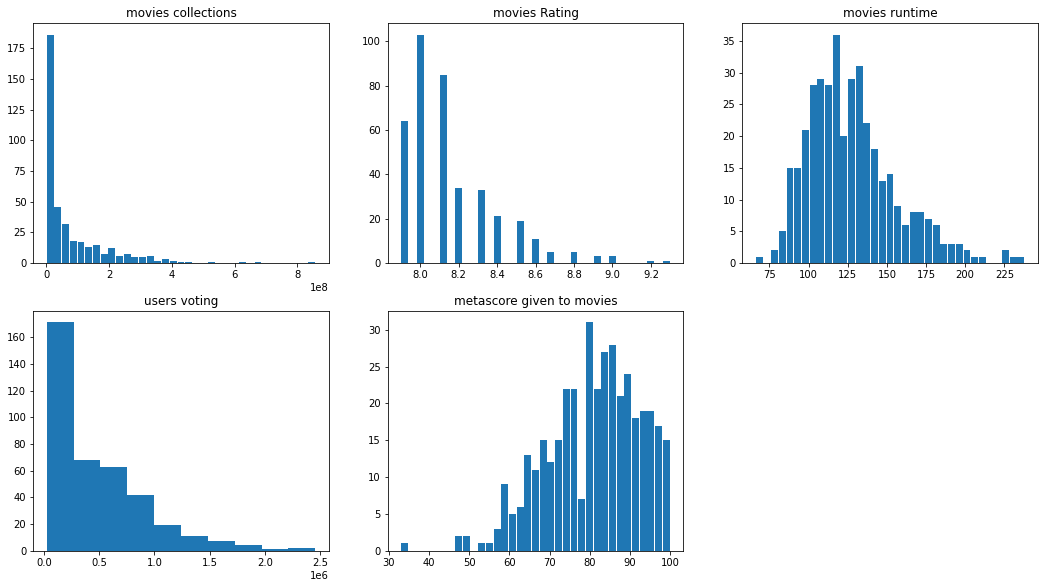

In [24]:
plt.figure(figsize=(18,15))

# Histograms of the data
plt.subplot(3, 3, 1)
plt.hist(data_df["boxoffice"],rwidth = 0.9, bins =35)
plt.title("movies collections")

plt.subplot(3, 3, 2)
plt.hist(data_df['Rating'],rwidth = 0.9, bins =35)
plt.title("movies Rating")

plt.subplot(3, 3, 3)
plt.hist(data_df['Runtime'],rwidth = 0.9, bins =35)
plt.title("movies runtime")


plt.subplot(3, 3, 4)
plt.hist(data_df['Voting'])
plt.title("users voting")

plt.subplot(3, 3, 5)
plt.hist(data_df['metascore'],rwidth = 0.9, bins =35)
plt.title("metascore given to movies")

plt.show()

1. None of the features are normally distributed 
2. Most of the films have rating around 8.0
3. most of the films have metascore 80
4. most of the films collections around 70 million usd

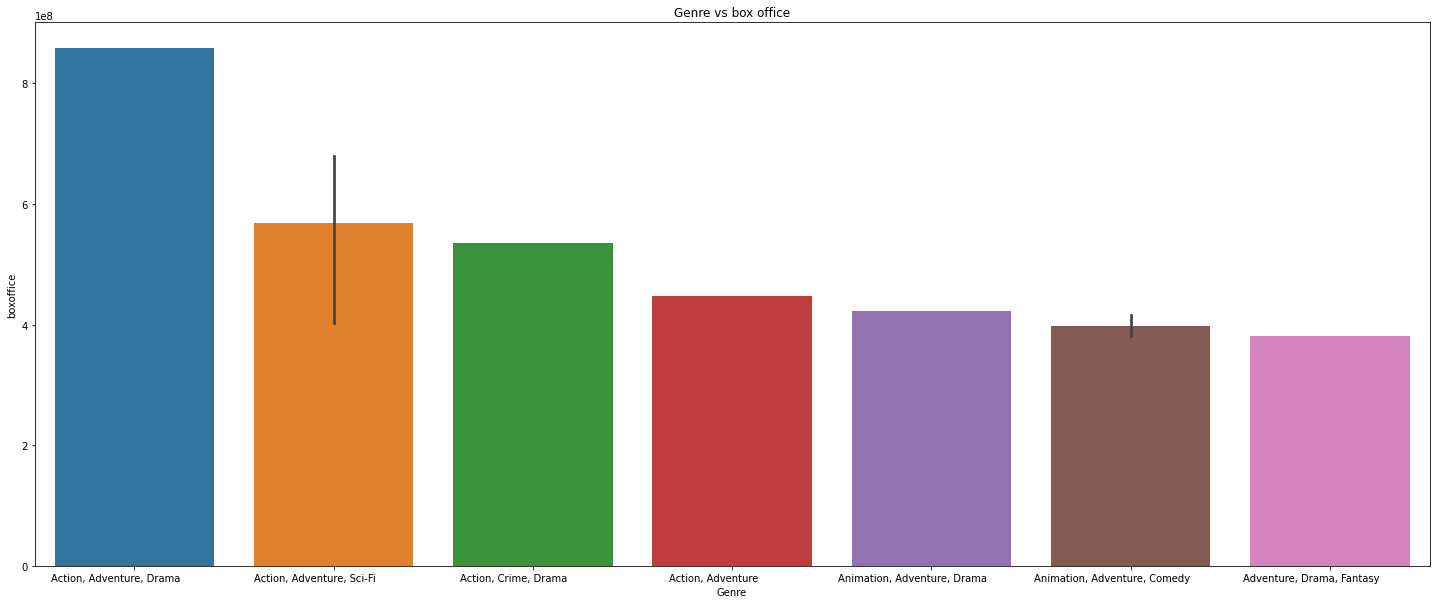

In [25]:
plt.figure(figsize=(25,10))
large=data_df.nlargest(10,'boxoffice')
sns.barplot(x='Genre',y='boxoffice',data=large)
plt.title('Genre vs box office')
plt.show()

movies under Action, Adventure,Drama Genre collected more compare to other genres

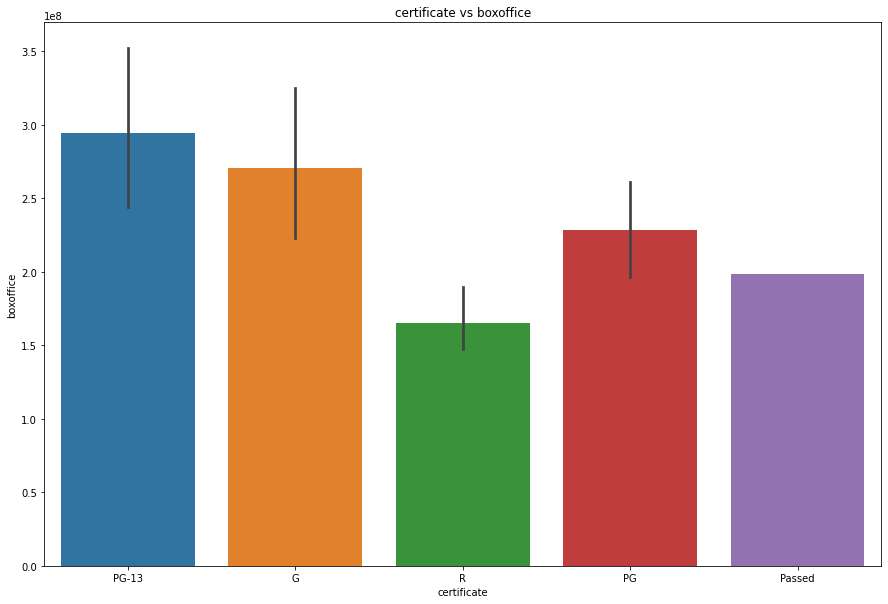

In [26]:
plt.figure(figsize=(15,10))
large=data_df.nlargest(100,'boxoffice')
sns.barplot(x='certificate',y='boxoffice',data=large)
plt.title('certificate vs boxoffice')
plt.show()

 PG-13, G and R certified movies collected more compare to other movies

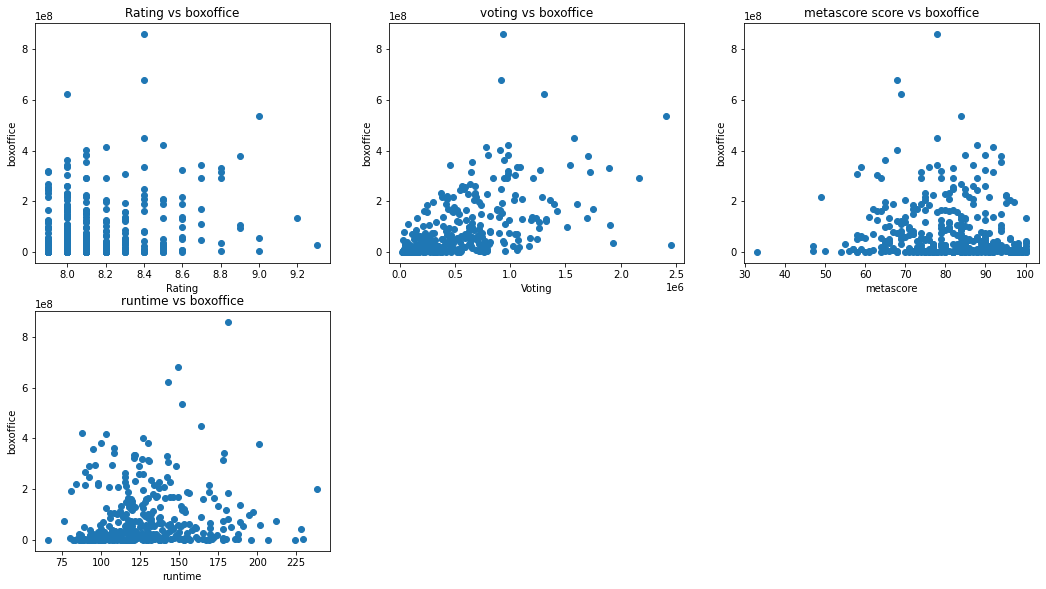

In [27]:
plt.figure(figsize=(18,15))

plt.subplot(3,3,1)
plt.scatter(data_df["Rating"], data_df["boxoffice"])
plt.xlabel('Rating')
plt.ylabel('boxoffice')
plt.title("Rating vs boxoffice")

plt.subplot(3,3,2)
plt.scatter(data_df["Voting"], data_df['boxoffice'])
plt.xlabel('Voting')
plt.ylabel('boxoffice')
plt.title("voting vs boxoffice")

plt.subplot(3,3,3)
plt.scatter(data_df["metascore"], data_df["boxoffice"])
plt.xlabel('metascore')
plt.ylabel('boxoffice')
plt.title("metascore score vs boxoffice")

plt.subplot(3,3,4)
plt.scatter(data_df['Runtime'],data_df['boxoffice'])
plt.xlabel('runtime')
plt.ylabel('boxoffice')
plt.title("runtime vs boxoffice")


plt.show()

In [ ]:
plt.figure(figsize=(18,15))

plt.subplot(3,3,1)
plt.scatter(data_df["Rating"], data_df["boxoffice"])
plt.xlabel('Rating')
plt.ylabel('boxoffice')
plt.title("Rating vs boxoffice")

plt.subplot(3,3,2)
plt.scatter(data_df["Voting"], data_df['boxoffice'])
plt.xlabel('Voting')
plt.ylabel('boxoffice')
plt.title("voting vs boxoffice")

plt.subplot(3,3,3)
plt.scatter(data_df["metascore"], data_df["boxoffice"])
plt.xlabel('metascore')
plt.ylabel('boxoffice')
plt.title("metascore score vs boxoffice")

plt.subplot(3,3,4)
plt.scatter(data_df['Runtime'],data_df['boxoffice'])
plt.xlabel('runtime')
plt.ylabel('boxoffice')
plt.title("runtime vs boxoffice")


plt.show()

In [28]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 388 entries, 0 to 549
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        388 non-null    object 
 1   Rating       388 non-null    float64
 2   Year         388 non-null    int64  
 3   Voting       388 non-null    int64  
 4   Genre        388 non-null    object 
 5   Runtime      388 non-null    int64  
 6   metascore    388 non-null    int64  
 7   certificate  388 non-null    object 
 8   boxoffice    388 non-null    float64
dtypes: float64(2), int64(4), object(3)
memory usage: 30.3+ KB


In [29]:
data_df.corr()

,Rating,Year,Voting,Runtime,metascore,boxoffice
Rating,1.000000,-0.123196,0.662028,0.254567,0.119583,0.200112
Year,-0.123196,1.000000,0.239113,0.001796,-0.360829,0.260393
Voting,0.662028,0.239113,1.000000,0.166860,-0.099942,0.586824
Runtime,0.254567,0.001796,0.166860,1.000000,-0.091774,0.118866
metascore,0.119583,-0.360829,-0.099942,-0.091774,1.000000,-0.100237
boxoffice,0.200112,0.260393,0.586824,0.118866,-0.100237,1.000000


Box-plot, Bar-plot, count plot,   violin-plot,
Distribution-plot, and kde-plot etc

In [149]:
data_df.groupby('Genre')['Genre'].count()

Genre
Action, Adventure                         4
Action, Adventure, Comedy                 4
Action, Adventure, Drama                  8
Action, Adventure, Fantasy                4
Action, Adventure, History                1
                                         ..
Horror, Sci-Fi                            1
Mystery, Romance, Thriller                1
Mystery, Sci-Fi, Thriller                 1
Mystery, Thriller                         3
Western                                   3
Name: Genre, Length: 128, dtype: int64

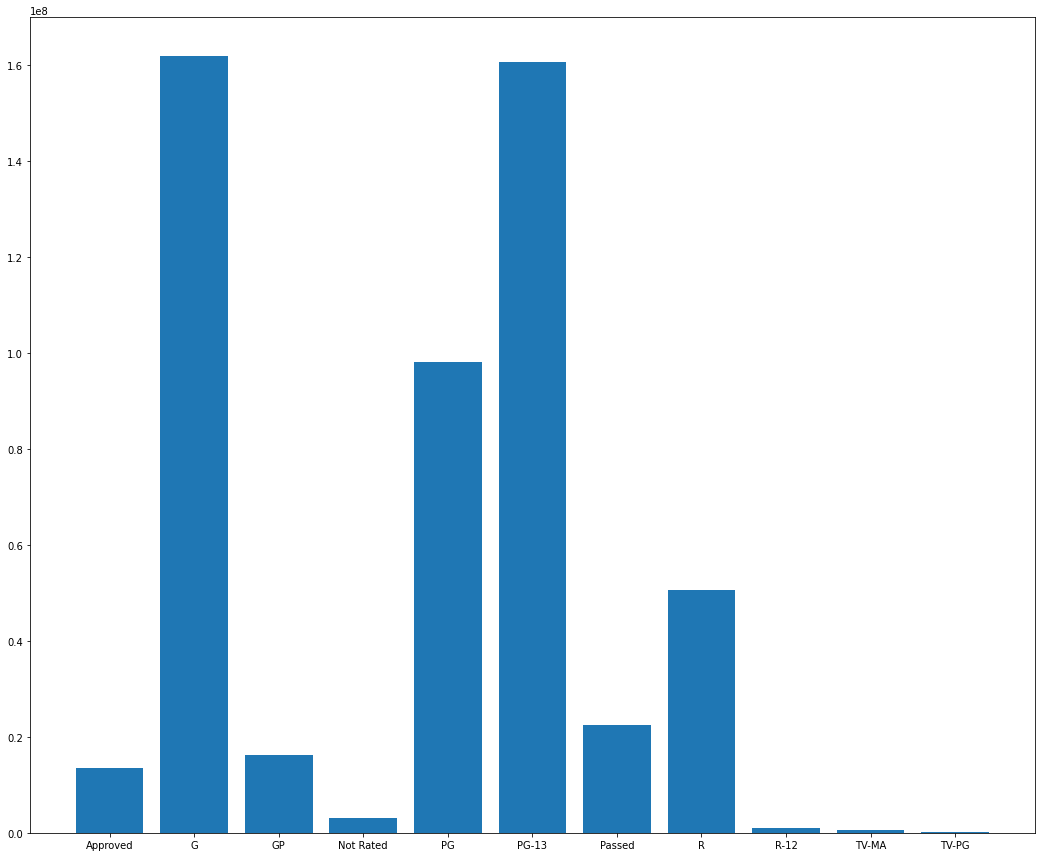

In [154]:
plt.figure(figsize=(18,15))
plt.bar(data_df.groupby('certificate')['boxoffice'].mean().index, data_df.groupby('certificate')['boxoffice'].mean())
plt.show()

In [ ]:
plt.figure(figsize=(18,15))
plt.bar(data_df.groupby('certificate')['boxoffice'].mean().index, data_df.groupby('certificate')['boxoffice'].mean())
plt.show()

Among all the features voting and Rating are moderately correlated

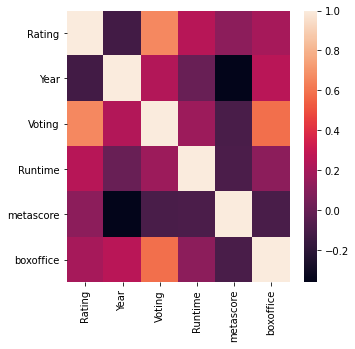

In [30]:
plt.figure(figsize=(5,5))
sns.heatmap(data=data_df.corr())
plt.show()

In [3]:
s={}
s['name']='Abhi'
s['course']='Datascience'

In [4]:
s

{'course': 'Datascience', 'name': 'Abhi'}

In [5]:
a=[[1,2,3],5]

In [7]:
a[0][2]

3

In [8]:
s='This is my project presentation'


In [9]:
r=s.split()

In [14]:
for i in r:
  if i[0]=='p':
    print(i)

project
presentation


In [ ]:
plt.pie(data_df['Genre'].value_counts())

In [138]:
a=data_df['Genre'].value_counts()